The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [26]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!
nobel = pd.read_csv("../datasets/nobel.csv")
nobel

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-00-00,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America,NaN,NaN,NaN
996,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1031,Individual,Aleksey Yekimov,1945-00-00,NaN,USSR (now Russia),Male,Nanocrystals Technology Inc.,"New York, NY",United States of America,NaN,NaN,NaN
997,2023,Literature,The Nobel Prize in Literature 2023,"""for his innovative plays and prose which give...",1/1,1032,Individual,Jon Fosse,1959-09-29,Haugesund,Norway,Male,NaN,NaN,NaN,NaN,NaN,NaN
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN,NaN,NaN,NaN


**Question 1:** What is the most commonly awarded gender and birth country?

Solution with Pandas

In [27]:
genders = nobel.value_counts("sex").sort_values(ascending=False)
genders

sex
Male      905
Female     65
Name: count, dtype: int64

In [28]:
countries = nobel.value_counts("birth_country").sort_values(ascending=False)
countries.head(5)

birth_country
United States of America    291
United Kingdom               91
Germany                      67
France                       58
Sweden                       30
Name: count, dtype: int64

Solution with Seaborn

<Axes: xlabel='sex', ylabel='count'>

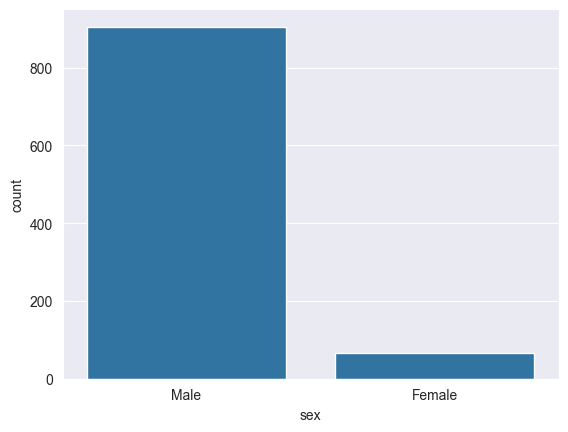

In [29]:
sns.countplot(x='sex',data=nobel)

In [30]:
top_gender = 'Male'
top_country = 'United States of America'

**Question 2:** What decade had te highest propotion of US-born winners?

In [31]:
nobel["decade"] = nobel["year"].apply(lambda x: x // 10 * 10)
nobel["is_usa"] = nobel["birth_country"].apply(lambda x: 1 if x == 'United States of America' else 0)
nobels_proportion_usa = nobel.groupby("decade", as_index=False)["is_usa"].mean()
nobels_proportion_usa

,decade,is_usa
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


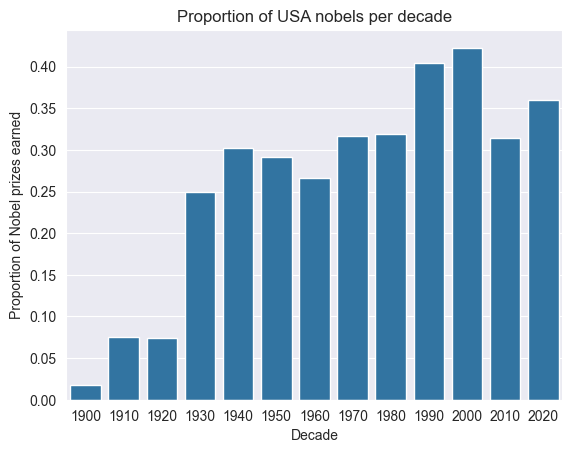

In [32]:
ax = sns.barplot(data=nobels_proportion_usa,x='decade',y='is_usa')
ax.set_title("Proportion of USA nobels per decade")
ax.set_ylabel("Proportion of Nobel prizes earned")
ax.set_xlabel("Decade");

In [33]:
max_decade_usa = 2000

**Question 3:** What decade and category pair had the highest proportion of female laureates?

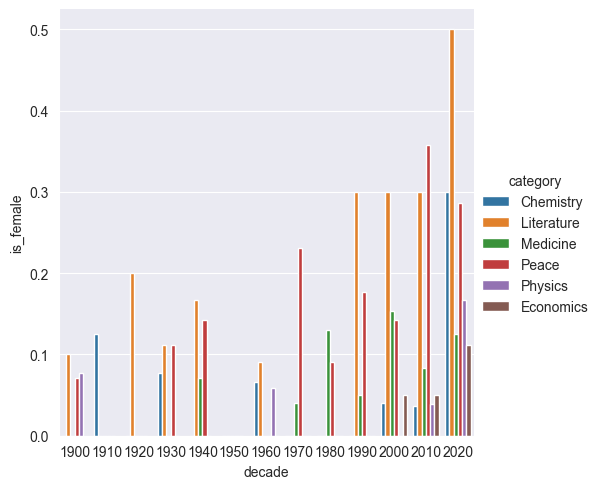

In [34]:
nobel["is_female"] = nobel["sex"].apply(lambda x: 1 if x == 'Female' else 0)
nobels_proportion_female = nobel.groupby(["decade","category"],as_index=False)["is_female"].mean()
sns.catplot(kind='bar', 
            x='decade', 
            hue='category',
            y='is_female',
            data=nobels_proportion_female);

In [35]:
max_female_dict = {2020:"Literature"}

**Question 4:** Who was the first woman to receive a Nobel Prize, and in what category?

In [36]:
nobel_first_woman = nobel[nobel["sex"]=="Female"]\
                    .sort_values(["year"], ascending=True)\
                    .iloc[0]
nobel_first_woman

year                                                                 1903
category                                                          Physics
prize                                     The Nobel Prize in Physics 1903
motivation              "in recognition of the extraordinary services ...
prize_share                                                           1/4
laureate_id                                                             6
laureate_type                                                  Individual
full_name                                     Marie Curie, née Sklodowska
birth_date                                                     1867-11-07
birth_city                                                         Warsaw
birth_country                                     Russian Empire (Poland)
sex                                                                Female
organization_name                                                     NaN
organization_city                     

In [37]:
first_woman_name = "Marie Curie, née Sklodowska"
first_woman_category = "Physics"

**Quesiton 5** Which individuals or organizations have won multiple Nobel Prizes throughout the years?

In [38]:
amount_nobels = nobel.value_counts("full_name")
multiple_nobels = amount_nobels[amount_nobels > 1]
repeat_list = multiple_nobels.index.tolist()